Let’s begin by installing and importing the necessary packages\libraries. This is a fundamental step required in every exploratory data analysis process.

In [1]:
# Install tabulate 
# Tabulate is a python package which helps in organizing your output in a clean tabular format
!pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate

# Step 1: Select and perform analysis

###### Loading each of the 3 dataset

The datasets are available for download from [https://figshare.com/projects/Wikipedia_Talk/16731](https://figshare.com/projects/Wikipedia_Talk/16731) and should be uploaded to the Jupyter environment before proceeding to the below steps.

In [3]:
# Reading each of the 3 .tsv files from the toxicity dataset
toxicity_annotations = pd.read_csv("toxicity_annotations.tsv", delimiter="\t")
toxicity_annotated_comments = pd.read_csv("toxicity_annotated_comments.tsv", delimiter="\t")
toxicity_worker_demographics = pd.read_csv("toxicity_worker_demographics.tsv", delimiter="\t")

In [4]:
# Reading each of the 3 .tsv files from the attack dataset
personal_annotations = pd.read_csv("attack_annotations.tsv", delimiter="\t")
personal_annotated_comments = pd.read_csv("attack_annotated_comments.tsv", delimiter="\t")
personal_worker_demographics = pd.read_csv("attack_worker_demographics.tsv", delimiter="\t")

In [5]:
# Reading each of the 3 .tsv files from the aggression dataset
aggression_annotations = pd.read_csv("aggression_annotations.tsv", delimiter="\t")
aggression_annotated_comments = pd.read_csv("aggression_annotated_comments.tsv", delimiter="\t")
aggression_worker_demographics = pd.read_csv("aggression_worker_demographics.tsv", delimiter="\t")

## Exploratory data analysis on Wikipedia Talk corpus dataset

## Analysis 1 - Using toxicity dataset

###### Initial exploration to understand and summarize the toxicity dataset

In [6]:
# To understand the shape of each of the 3 .tsv files in the toxicity dataset
print('toxicity_annotations ', toxicity_annotations.shape)
print('toxicity_annotated_comments', toxicity_annotated_comments.shape)
print('toxicity_worker_demographics', toxicity_worker_demographics.shape)

toxicity_annotations  (1598289, 4)
toxicity_annotated_comments (159686, 7)
toxicity_worker_demographics (3591, 5)


###### Explore the first few rows of each table within the toxicity dataset

In [7]:
toxicity_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


In [8]:
toxicity_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test


In [9]:
toxicity_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


###### Join the annotation table with the annotate comment table

In [10]:
# Combine the toxicity_annotations.tsv & toxicity_annotated_comments.tsv on rev_id column and save it as toxicity_annotate_comment
toxicity_annotate_comment = pd.merge(toxicity_annotations, toxicity_annotated_comments, on='rev_id')
print('Shape of toxicity_annotate_comment :', toxicity_annotate_comment.shape)

Shape of toxicity_annotate_comment : (1598289, 10)


###### Join the toxicity_annotate_comment  with worker demographic table

In [11]:
# Combine the toxicity_annotate_comment and toxicity_worker_demographics.tsv on the worker_id column and save it as toxicity_final
toxicity_final = pd.merge(toxicity_annotate_comment, toxicity_worker_demographics, on='worker_id')
print('Final dataset used for Analysis 1 is toxicity_final!')

Final dataset used for Analysis 1 is toxicity_final!


In [12]:
# Check for null values in the final dataset
toxicity_final.isnull().sum()

rev_id                        0
worker_id                     0
toxicity                      0
toxicity_score                0
comment                       0
year                          0
logged_in                     0
ns                            0
sample                        0
split                         0
gender                        0
english_first_language        0
age_group                 29314
education                     0
dtype: int64

**Observations-** The age_group column is the only column with null values. With this, we have an idea of what our dataset looks like. Let’s now see how we can use a few functions to explore this dataset further.

## Q1 -  Looking at the distribution of toxic vs non toxic comments across namespace

Let's start by looking at the toxicity distribution by namespace. I am hoping to find if we have more toxic comments in the user namespace.

In [13]:
# Calculating the counts of comments based on namespace and toxicity
toxicity_final.groupby('ns')['toxicity'].value_counts()

ns       toxicity
article  0           492581
         1            52728
user     0           658075
         1           143571
Name: toxicity, dtype: int64

Now that I have confirmed more toxic contents are in the user namespace indeed, let's add some visuals.

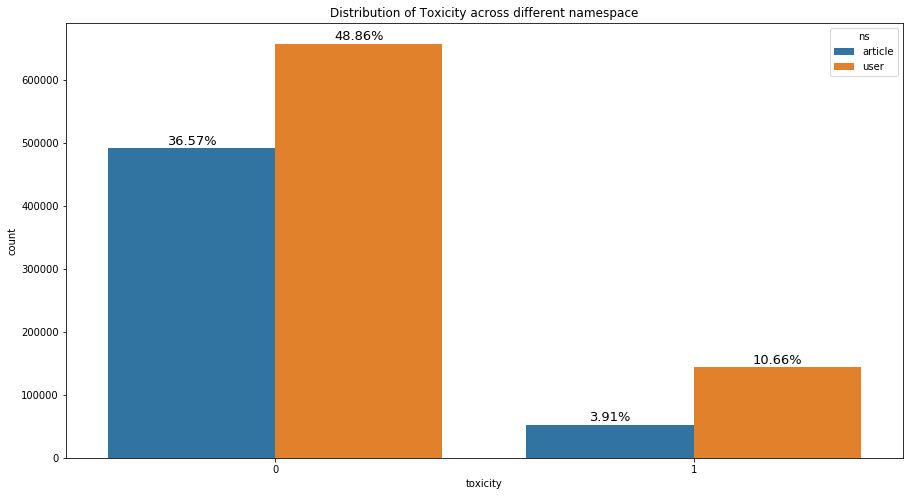

In [14]:
# Using a countplot to show the toxicity distribution across different namespace
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of Toxicity across different namespace")
ax.set(xlabel ='Toxicity')
ax.set(ylabel='Comment count')

plot = sns.countplot( x="toxicity", data=toxicity_final, hue = 'ns' ,ax=ax )

# Function to print the %'s for each of the bar
ax = plot.axes
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100 / toxicity_final.shape[0]:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=13, 
                color='black',
                xytext=(0,7), 
                textcoords='offset points')
plt.show()   

We now know the toxicity of the comments in our dataset, but what about the distribution of toxicity score?

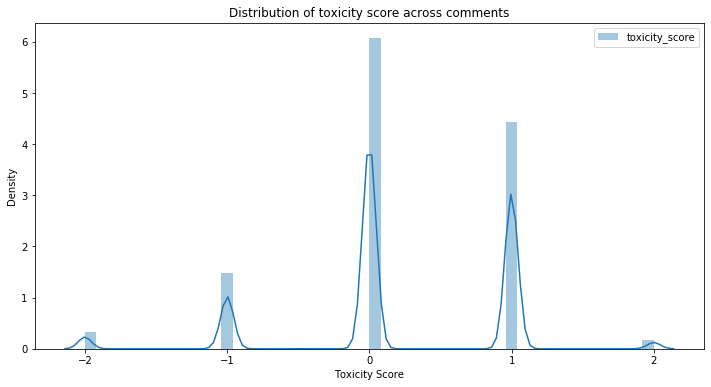

In [15]:
# Using a dist plot to show the histogram of the toxicity score
plt.figure(figsize=(12,6))
plt.title("Distribution of toxicity score across comments")
ax = sns.distplot(toxicity_final['toxicity_score'],hist=True, label='toxicity_score')
# Set the x and y axis labels
ax.set(xlabel='Toxicity Score', ylabel='Density')
plt.legend()
plt.show()

**Key Findings for Q1-** Looking at the toxicity and the toxicity score distribution, a few things can be observed:

- 85% of the comments are non-toxic with only 15% of toxic comments.
- Of the toxic comments about 11% are in the user namespace.
- Interesting to see most of the comments are marked as neutral to healthy (0 to 2) with fewer toxic and very toxic comments (0 to -2).

**Did you find bias-** Yes, the dataset does have response bias as it represents only few demographic groups or users and hence cannot be used for making inferences about all users. 

## Q2 -  Does toxicity increases with increase in comment length.

Lets start by looking at some of the basic comment statistics and then calculate the comment's character length and word count.I would like to test my hypothesis that smaller comments are more toxic as they are simple and fast to label.

In [16]:
# Looking at the comment statistics
print('Total comment count     :' ,toxicity_final['comment'].count())
print('No. of unique comments  :' , toxicity_final['comment'].nunique())
print('Rate of unique comments :' , round(toxicity_final['comment'].nunique()/toxicity_final['comment'].count() * 100), '%')

Total comment count     : 1346955
No. of unique comments  : 159463
Rate of unique comments : 12.0 %


**Observation-** Only 12% of all comments are unique!

In [17]:
# Adding a column to calculate the comment length
toxicity_final['comment_length']= toxicity_final['comment'].str.len()

In [18]:
# Print the basic comment length statistics
print('Mean      ',toxicity_final['comment_length'].mean())
print('Median    ',toxicity_final['comment_length'].median())
print('Minimum   ',toxicity_final['comment_length'].min())
# First quartile (Q1) 
Q1 = np.percentile(toxicity_final['comment_length'], 25, interpolation = 'midpoint') 
print('25%       ', Q1)
# Second quartile (Q2) 
Q2 = np.percentile(toxicity_final['comment_length'], 50, interpolation = 'midpoint') 
print('50%       ', Q2)
# Third quartile (Q3) 
Q3 = np.percentile(toxicity_final['comment_length'], 75, interpolation = 'midpoint') 
print('75%       ', Q3)
print('Max       ',toxicity_final['comment_length'].max())

Mean       446.5126295978707
Median     245.0
Minimum    21
25%        127.0
50%        245.0
75%        488.0
Max        9242


**Observation-** Mean of the comment character length is about double the median which means the dataset could be skewed by outliers. The largest comment is 9242 characters, while the inter-quartile range is only 21 to 488 characters which does confirm our intincts that the dataset has large comments resulting in outliers.

In [19]:
# Adding a column to calculate the word length for further analysis
toxicity_final['total_words'] = toxicity_final.comment.apply(lambda x: len(x.split()))

In [20]:
# Print the basic word count statistics
print('Mean      ',toxicity_final['total_words'].mean())
print('Median    ',toxicity_final['total_words'].median())
print('Minimum   ',toxicity_final['total_words'].min())
# First quartile (Q1) 
Q1 = np.percentile(toxicity_final['total_words'], 25, interpolation = 'midpoint') 
print('25%       ', Q1)
# Second quartile (Q2) 
Q2 = np.percentile(toxicity_final['total_words'], 50, interpolation = 'midpoint') 
print('50%       ', Q2)
# Third quartile (Q3) 
Q3 = np.percentile(toxicity_final['total_words'], 75, interpolation = 'midpoint') 
print('75%       ', Q3)
print('Max       ',toxicity_final['total_words'].max())

Mean       66.90370576596843
Median     36.0
Minimum    0
25%        17.0
50%        36.0
75%        75.0
Max        1411


**Observation-**  Word count stats are similar to that of the character lengths which is the way the English language is!!

###### Analyzing the comments at character and word count level through visualization

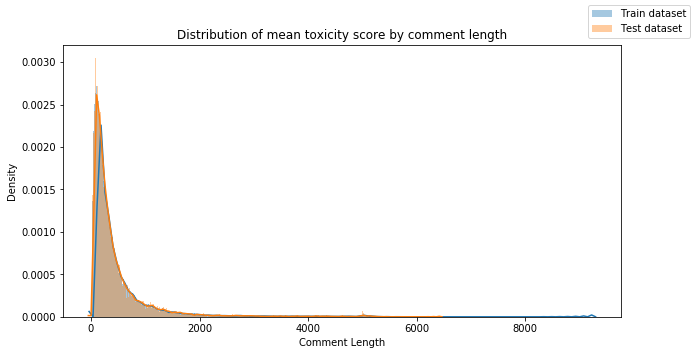

In [21]:
# Using a dist plot to show the histogram of the comment length at character level for both train and test split
fig = plt.figure(figsize=(10, 5))

# Splitting the dataset into train and test based on the split column value
data_train = toxicity_final.loc[toxicity_final['split'] == 'train']
data_test = toxicity_final.loc[toxicity_final['split'] == 'test']

# Calculate the bin size using the max comment length from train and test dataset
bin_size = max(data_train['comment_length'].max(), data_test['comment_length'].max())//10

ax = sns.distplot(data_train['comment_length'] ,bins = bin_size)
ax = sns.distplot(data_test['comment_length'],bins = bin_size)

# Set the title,labels and lengends
ax.set_title("Distribution of mean toxicity score by comment length")
ax.set(xlabel='Comment Length', ylabel='Density')
fig.legend(labels=['Train dataset','Test dataset'], loc='upper right', frameon=True)
plt.show()

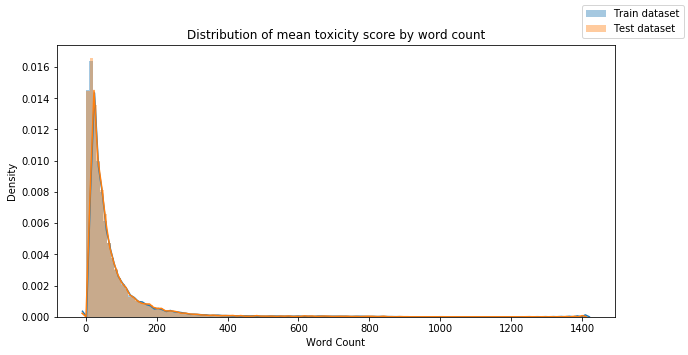

In [22]:
# Using a dist plot to show the histogram of the word count of comment for both train and test split
fig= plt.figure(figsize=(10, 5))

# Splitting the dataset into train and test based on the split column value
data_train = toxicity_final.loc[toxicity_final['split'] == 'train']
data_test = toxicity_final.loc[toxicity_final['split'] == 'test']

# Calculate the bin size using the max comment length from train and test dataset
bin_size = max(data_train['total_words'].max(), data_test['total_words'].max())//10

ax=sns.distplot(data_train['total_words'] ,bins = bin_size)
ax=sns.distplot(data_test['total_words'],bins = bin_size )

# Set the title,labels and lengends
ax.set_title("Distribution of mean toxicity score by word count")
ax.set(xlabel='Word Count', ylabel='Density')
fig.legend(labels=['Train dataset','Test dataset'], loc='upper right', frameon=True)
plt.show()

**Observation-** Analyzing the comment length at word and character count we find the below observations -

 - Similar distribution for both word and character count
 - Most of the comments are 2000 characters long with the word count under the range of 200
 - Additionally, the test and train data have similar distributions for word count where as it is different for comment length. The train dataset has longer comments compared to the test dataset.
 
Looking at most of the comments 2000 character long makes me wonder if there was some text truncation process during the data collection phase. What if the toxicity occurs after the truncation which could impacts the models trained on this dataset. However, I still do observe a very small portion of the comments with character length > 2000 and hence makes if difficult to confirm if there was any truction process involved.

###### As there isn't much difference between character and word count distribution , I will use word count for my further analysis.

In [23]:
# Creating bins to bucket the word count based on intervals for a better visual
bins = [0,200,400,600,800,1000,1200,1400,1600]
toxicity_final['binned_wordcount'] = pd.cut(toxicity_final['total_words'],bins)

In [24]:
# Calculating the mean toxicity score based on the binned word count
avg_word_toxicity = toxicity_final.groupby("binned_wordcount")["toxicity_score"].mean()
print('The mean toxicity score per',avg_word_toxicity)

The mean toxicity score per binned_wordcount
(0, 200]        0.199936
(200, 400]      0.403900
(400, 600]      0.367464
(600, 800]      0.305823
(800, 1000]    -0.048215
(1000, 1200]   -1.324503
(1200, 1400]   -1.099010
(1400, 1600]   -1.250000
Name: toxicity_score, dtype: float64


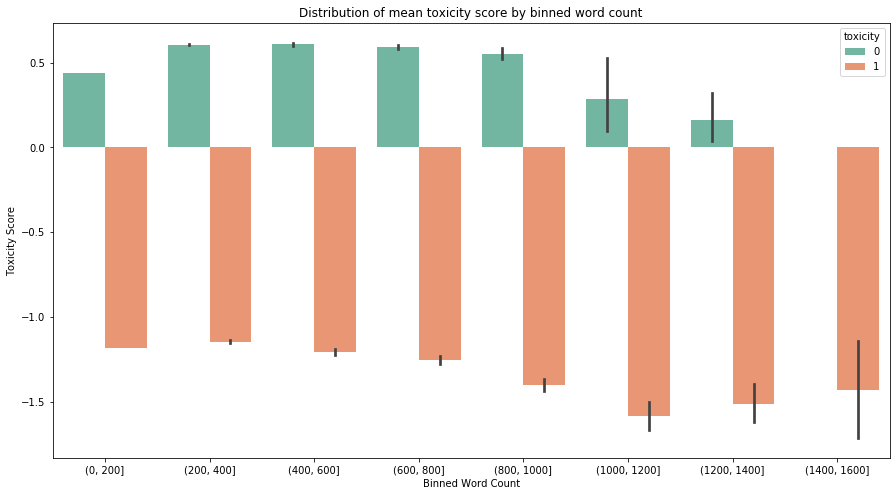

In [25]:
# Plotting the mean toxicity score based on the binned word count to confirm my findings through a visual 
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of mean toxicity score by binned word count")
ax = sns.barplot(x="binned_wordcount", y="toxicity_score",hue="toxicity", data=toxicity_final,palette = "Set2")
# Set the x and y axis labels
ax.set(xlabel='Binned Word Count', ylabel='Toxicity Score')
plt.show()

**Key Findings for Q2-** Yes, toxicity does increase with increase in comment length which is clearly evident from the above plot thus rejecting my hypothesis that smaller comments are more toxic.
 
**Did you find bias-** Based on all the above observations on the character length, its pretty unclear if there was a truncation process involved during the data collection phase. Hence, it is difficult to conclude if there was a bias or not.

### Q3 -  Has toxicity increased over years and how does that compare with the comment count?

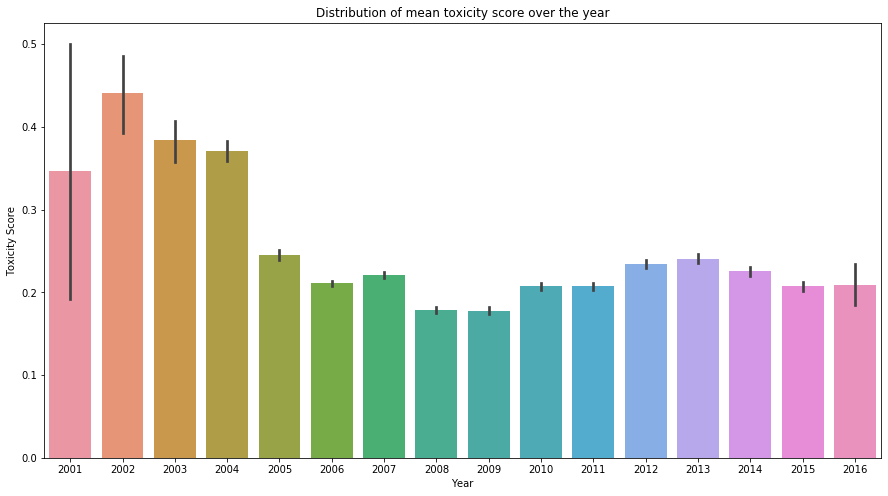

In [26]:
# Barplot to see if the toxicity has increased over the years.
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot( y="toxicity_score", x="year", data=toxicity_final, ax=ax)

# Set the title and x and y axis labels
ax.set_title("Distribution of mean toxicity score over the year")
ax.set(xlabel='Year', ylabel='Toxicity Score')
plt.show()

**Observation-** Yes, toxicity has decreased over the years. Now lets look at how toxicity compares against the comment count.

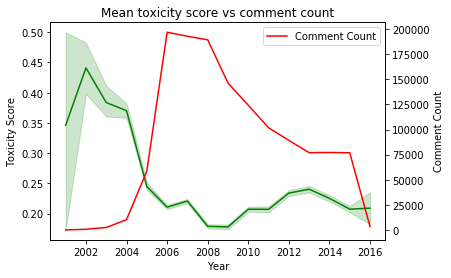

In [27]:
# Line plot to show how toxicity score compares againt the comment count
ax1 =sns.lineplot(x = 'year', y='toxicity_score', data =toxicity_final,color="g")
ax2 = plt.twinx()

data = toxicity_final.groupby('year', as_index=False)['comment'].count()
sns.lineplot(x = 'year', y='comment', data =data,color="r", ax=ax2)

# Set the title , x and y axis labels and lengend
ax1.set_title("Mean toxicity score vs comment count")
ax1.set(xlabel='Year', ylabel='Toxicity Score')
ax2.set(xlabel='Year', ylabel='Comment Count')
ax2.legend(labels=['Comment Count'], loc='upper right', frameon=True)

# show the plot
plt.show()

**Key Findings for Q3-** No, intrestingly toxicity has decreased over the years even with increase in the comment count. Does this mean more moderators are doing a better job? Or was there a use of some kind of tool or models to help such moderations?

### Q4 -  Exploring the relationships between worker demographics and labeling behavior

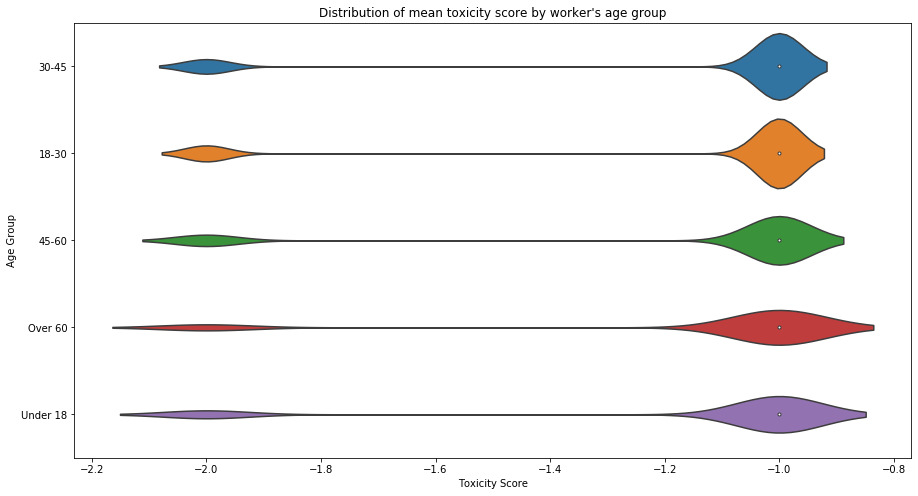

In [28]:
# Filtering the data to show only comments with toxicity value as 1
data_toxic = toxicity_final.loc[toxicity_final['toxicity'] == 1]
fig, ax = plt.subplots(figsize=(15,8))
# Violin plot to show the ditribution of toxicity score based on worker's age group
ax = sns.violinplot( x="toxicity_score", y="age_group", data=data_toxic, ax=ax )
ax.set_title("Distribution of mean toxicity score by worker's age group")
ax.set(xlabel='Toxicity Score', ylabel='Age Group')
plt.show()

**Observation-** Toxicity score does vary by age group with "30-45" age-group having the highest toxicity score and "over 60" and "under 18" having least toxicity score.

In [29]:
# Exploring to relationship between education and toxicity score
count_toxic = toxicity_final.groupby(['toxicity','education'])['toxicity_score'].mean()
print(count_toxic)

toxicity  education   
0         bachelors       0.448943
          doctorate       0.469980
          hs              0.465070
          masters         0.419512
          none            0.877958
          professional    0.438178
          some            0.454024
1         bachelors      -1.181694
          doctorate      -1.220126
          hs             -1.203578
          masters        -1.171097
          none           -1.073770
          professional   -1.146395
          some           -1.225429
Name: toxicity_score, dtype: float64


**Observation-** Interesting to see how crowdworkers with no schooling experience followed by professional (both being two ends of a spectrum) tend to label contents more toxic.

# Analysis 2

###### Initial exploration to understand the personal attack dataset

In [30]:
print('personal_annotations ', personal_annotations.shape)
print('personal_annotated_comments', personal_annotated_comments.shape)
print('personal_worker_demographics', personal_worker_demographics.shape)

personal_annotations  (1365217, 7)
personal_annotated_comments (115864, 7)
personal_worker_demographics (2190, 5)


##### Explore the first few rows of each table within the personal attack dataset

In [31]:
personal_annotations.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0


In [32]:
personal_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [33]:
personal_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


###### Join the annotation table with the annotate comment table

In [34]:
personal_annotate_comment = pd.merge(personal_annotations, personal_annotated_comments, on='rev_id')
print('Combined personal annotations and comment ', personal_annotate_comment.shape)

Combined personal annotations and comment  (1365217, 13)


###### Join the above combined table with worker demographic table

In [35]:
personal_final = pd.merge(personal_annotate_comment, personal_worker_demographics, on='worker_id')
print('personal_final ', personal_final.shape)

personal_final  (855514, 17)


###### Join the above toxicity and personal attack dataset

In [36]:
personal_toxicity = pd.merge(personal_final, toxicity_final, on='rev_id',suffixes=('', '_y'))
personal_toxicity.drop(personal_toxicity.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
print('personal_toxicity ', personal_toxicity.shape)

personal_toxicity  (4620868, 22)


In [37]:
personal_toxicity[personal_toxicity.comment.isnull()]
personal_toxicity[personal_toxicity.comment == '']
print('There are no null values or blanks in the comment column')

There are no null values or blanks in the comment column


In [38]:
personal_toxicity.shape[0]

4620868

In [39]:
# Making sure there are no duplicate values
my_list = personal_toxicity.columns.values.tolist()
my_list

['rev_id',
 'worker_id',
 'quoting_attack',
 'recipient_attack',
 'third_party_attack',
 'other_attack',
 'attack',
 'comment',
 'year',
 'logged_in',
 'ns',
 'sample',
 'split',
 'gender',
 'english_first_language',
 'age_group',
 'education',
 'toxicity',
 'toxicity_score',
 'comment_length',
 'total_words',
 'binned_wordcount']

### Q1 - What percent of personal attacks are considered toxic?

In [40]:
# Calculating the % of comments which are considered some form of an attack and was labeled toxic
attack_toxicity = personal_toxicity[(personal_toxicity['attack'] == 1) & (personal_toxicity['toxicity'] == 1)]
print('Is an attack and labeled toxic :' ,round(attack_toxicity.rev_id.count()/personal_toxicity.shape[0] * 100), '%')

# Calculating the % of comments which are considered some form of an attack but was labeled non-toxic
attack_toxicity = personal_toxicity[(personal_toxicity['attack'] == 1) & (personal_toxicity['toxicity'] == 0)]
print('Is an attack but labeled non-toxic :' ,round(attack_toxicity.rev_id.count()/personal_toxicity.shape[0] * 100), '%')

# Calculating the % of comments which were not an attack but was labeled toxic
attack_toxicity = personal_toxicity[(personal_toxicity['attack'] == 0) & (personal_toxicity['toxicity'] == 1)]
print('Not an attack but labeled toxic :' ,round(attack_toxicity.rev_id.count()/personal_toxicity.shape[0] * 100), '%')

# Calculating the % of comments which were not an attack but was labeled non-toxic
attack_toxicity = personal_toxicity[(personal_toxicity['attack'] == 0) & (personal_toxicity['toxicity'] == 0)]
print('Not an attack and labeled non-toxic :' ,round(attack_toxicity.rev_id.count()/personal_toxicity.shape[0] * 100), '%')

Is an attack and labeled toxic : 14.0 %
Is an attack but labeled non-toxic : 9.0 %
Not an attack but labeled toxic : 10.0 %
Not an attack and labeled non-toxic : 67.0 %


**Key Findings for Q1-** I find the above stats pretty serious especially around attack comments labeled non-toxic and vice-versa. Around 9% of comments which are labeled as some form of an attack are considered non toxic and 10% was labeled not an attack but still ended up being toxic. This shows that some types of hostile speeches are harder for crowdworkers to agree upon. That being said, it is also relieving to see about 67% of the comments that were not an attack being labeled correctly as non-toxic.

**Did you find bias-** Yes, disagreement among crowdworkers will impact the reliability of the models trained on these datasets. It is even a possible case where a typically more toxic comment is labeled non-toxic and a less toxic comment becomes toxicified when it involves sensitive elements such as politics,sexuality,religion etc. 

### Q2 - Which of these personal attacks are the most and the least toxic?

In [41]:
# Creating seperate subsets of data by filtering based on attack type and toxicity value

# Subset of data for quoting attack based on toxicity value
qt_0 =  personal_toxicity[personal_toxicity["quoting_attack"] == 0]
qt_1 =  personal_toxicity[personal_toxicity["quoting_attack"] == 1]
# Calculate the mean toxicity score for quoting attack
personal_toxicity_mean_q0 = qt_0['toxicity_score'].mean()
personal_toxicity_mean_q1 = qt_1['toxicity_score'].mean()
# Calculate the comment count for quoting attack
personal_toxicity_count_q0 = qt_0['toxicity_score'].count()
personal_toxicity_count_q1 = qt_1['toxicity_score'].count()

# Subset of data for recipient attack based on toxicity value
res_0 =  personal_toxicity[personal_toxicity["recipient_attack"] == 0]
res_1 =  personal_toxicity[personal_toxicity["recipient_attack"] == 1]
# Calculate the mean toxicity score for recipient attack
personal_toxicity_mean_r0 = res_0['toxicity_score'].mean()
personal_toxicity_mean_r1 = res_1['toxicity_score'].mean()
# Calculate the comment count for recipient attack
personal_toxicity_count_r0 = res_0['toxicity_score'].count()
personal_toxicity_count_r1 = res_1['toxicity_score'].count()

# Subset of data for third party attack based on toxicity value
tp_0 =  personal_toxicity[personal_toxicity["third_party_attack"] == 0]
tp_1 =  personal_toxicity[personal_toxicity["third_party_attack"] == 1]
# Calculate the mean toxicity score for third party attack
personal_toxicity_mean_tp0 = tp_0['toxicity_score'].mean()
personal_toxicity_mean_tp1 = tp_1['toxicity_score'].mean()
# Calculate the comment count for third party attack
personal_toxicity_count_tp0 = tp_0['toxicity_score'].count()
personal_toxicity_count_tp1 = tp_1['toxicity_score'].count()

# Subset of data for other attack based on toxicity value
oa_0 =  personal_toxicity[personal_toxicity["other_attack"] == 0]
oa_1 =  personal_toxicity[personal_toxicity["other_attack"] == 1]
# Calculate the mean toxicity score for other attack
personal_toxicity_mean_oa0 = oa_0['toxicity_score'].mean()
personal_toxicity_mean_oa1 = oa_1['toxicity_score'].mean()
# Calculate the comment count for other attack
personal_toxicity_count_oa0 = oa_0['toxicity_score'].count()
personal_toxicity_count_oa1 = oa_1['toxicity_score'].count()

In [42]:
# Printing the output in a tabular format using the tabulate package
print('\n')
print(tabulate([['quoting_attack','0',personal_toxicity_mean_q0,personal_toxicity_count_q0,personal_toxicity_count_q0/personal_toxicity.shape[0]],['recipient_attack', '0', personal_toxicity_mean_r0, personal_toxicity_count_r0, personal_toxicity_count_r0/personal_toxicity.shape[0]], \
                ['third_party_attack', '0', personal_toxicity_mean_tp0,personal_toxicity_count_tp0,personal_toxicity_count_tp0/personal_toxicity.shape[0]],['other_attack', '0', personal_toxicity_mean_oa0,personal_toxicity_count_oa0,personal_toxicity_count_oa0/personal_toxicity.shape[0]], \
                ['quoting_attack','1',personal_toxicity_mean_q1,personal_toxicity_count_q1,personal_toxicity_count_q1/personal_toxicity.shape[0]],['recipient_attack', '1', personal_toxicity_mean_r1,personal_toxicity_count_r1,personal_toxicity_count_r1/personal_toxicity.shape[0]], \
                ['third_party_attack', '1', personal_toxicity_mean_tp1,personal_toxicity_count_tp1,personal_toxicity_count_tp1/personal_toxicity.shape[0]], ['other_attack', '1', personal_toxicity_mean_oa1,personal_toxicity_count_oa1,personal_toxicity_count_oa1/personal_toxicity.shape[0]]],
               headers = ['Attack Type','Toxicity','Mean Toxic Score','Comment Count','Comment %'], tablefmt='orgtbl',floatfmt='.7f'))
print('\n')
print('The most toxic personal attack is quoting attack at:', (max(personal_toxicity_mean_q1,personal_toxicity_mean_tp1,personal_toxicity_mean_r1,personal_toxicity_mean_oa1)) * 100)
print('The least toxic personal attack is recipient attack at:', (min(personal_toxicity_mean_q1,personal_toxicity_mean_tp1,personal_toxicity_mean_r1,personal_toxicity_mean_oa1))*100)



| Attack Type        |   Toxicity |   Mean Toxic Score |   Comment Count |   Comment % |
|--------------------+------------+--------------------+-----------------+-------------|
| quoting_attack     |          0 |          0.0363178 | 4577753.0000000 |   0.9906695 |
| recipient_attack   |          0 |          0.1705546 | 3914301.0000000 |   0.8470921 |
| third_party_attack |          0 |          0.0611902 | 4401097.0000000 |   0.9524395 |
| other_attack       |          0 |          0.0539833 | 4422625.0000000 |   0.9570983 |
| quoting_attack     |          1 |         -0.3080366 |   43115.0000000 |   0.0093305 |
| recipient_attack   |          1 |         -0.7283513 |  706567.0000000 |   0.1529079 |
| third_party_attack |          1 |         -0.5293283 |  219771.0000000 |   0.0475605 |
| other_attack       |          1 |         -0.4326761 |  198243.0000000 |   0.0429017 |


The most toxic personal attack is quoting attack at: -30.803664617882408
The least toxic personal attack i

**Key Findings for Q2-** It is very clear from the above results that quoting attack is the most toxic with recipient attack being the least toxic. 

**Did you find bias-** Yes, the dataset does have selection bias when looking at the distribution of the comment counts across various attack with quoting comment having the least volume and hence cannot be used to make an overall inference.

### Q3 -  Are female-identified labelers more or less likely to label comments as toxic than male-identified labelers?

In [43]:
# Filtering the data based on the attack value 1
data =  personal_toxicity[personal_toxicity["attack"] == 1]
# Counting the comments labeled as an attack
attack_gender = data.groupby(['gender']).worker_id.count() 
# Calculating the mean of the attack based on gender
attack_gender/attack_gender.sum() *100

gender
female    38.006797
male      61.963586
other      0.029617
Name: worker_id, dtype: float64

**Observation-** Of all the comments labeled as some form of attack, male identified workers tend to label a comment more toxic than female idenfied workers.

###### Now lets look at specific attack categories to confirm if male identified workers label comments toxic than female identified.

In [44]:
# Looking at quoting attacks that where labeled toxic
quoting_attack = qt_1.groupby(['gender']).worker_id.count()
quoting_attack = quoting_attack/quoting_attack.sum()*100
quoting_attack

gender
female    38.325409
male      61.662994
other      0.011597
Name: worker_id, dtype: float64

In [45]:
# Looking at third party attacks that where labeled toxic
third_party_attack = tp_1.groupby(['gender']).worker_id.count()
third_party_attack/third_party_attack.sum()*100

gender
female    41.453604
male      58.506809
other      0.039587
Name: worker_id, dtype: float64

In [46]:
# Looking at recipient attacks that where labeled toxic
recipient_attack = res_1.groupby(['gender']).worker_id.count()
recipient_attack/recipient_attack.sum()*100

gender
female    38.593368
male      61.375779
other      0.030853
Name: worker_id, dtype: float64

In [47]:
# Looking at other attacks that where labeled toxic
other_attack = oa_1.groupby(['gender']).worker_id.count()
other_attack/other_attack.sum()*100

gender
female    36.719077
male      63.280923
Name: worker_id, dtype: float64

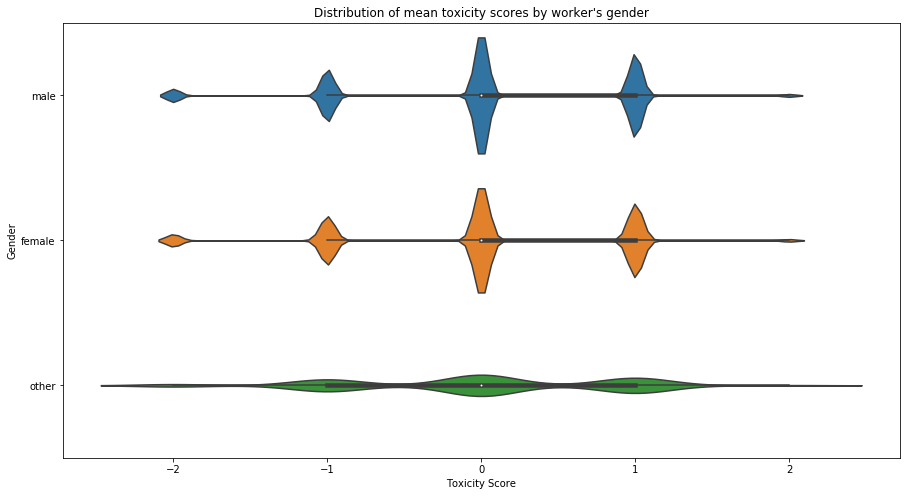

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of mean toxicity scores by worker's gender")
ax = sns.violinplot(data=personal_toxicity, y = 'gender' ,x = 'toxicity_score')
ax.set(xlabel='Toxicity Score', ylabel='Gender')
plt.show()

In [49]:
#Final check to see if the annotation workers are gender balanced before we confirm bias
worker_gender = personal_toxicity.groupby("gender").worker_id.count()
worker_gender/worker_gender.sum()

gender
female    0.366777
male      0.633073
other     0.000150
Name: worker_id, dtype: float64

**Key Findings for Q3-** No, intrestingly male workers are more likely to label a comment as an attack than the female workers. However, the dataset contains 63% of male annotation workers and only 36% of female annotation workers.

**Did you find bias-** Yes. Even when the mean toxicity score is high for male workers this could be skewed due to the gender imbalance of the annotation workers. 

# Step 2: Discuss further implications

1. Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why? 

Demo applications such as "Hot Topics","Author Perspective for Drupal" and "wikidetox" are some of the good examples where the Perspective API would perform well when trained on Wikipedia Talk corpus dataset. Such applications not only helps drive better conversations by giving real time response to the commenters but also help people to express themselves and seek feedbacks/opinions. Keeping in mind the truth that no dataset is pefect or clean, these applications will perform well when trained on the Wikipedia talk corpus dataset for the following reasons - 

 - Comments for these application broadly fall under the same domain as that of corpus dataset.
 - As the corpus dataset contains the comments, namespace (article/user) and the toxicity score, it can be used in predicting the toxicity score of an unpublished article or comments.
 - It could definitely be used as a pre check by authors to check when their comments might violate the community guidelines or be may be perceived as “Toxic” to the conversation.

2. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 

As the data is highly contexual and specific, you cannot deem a word toxic or assign any other tag to it until you know the topic,context or domain. While words with negative connotation,sexuality (gay, lesbian, homosexual),religion, racism, misogyny can be difficult to accurately detect using these machine learning models, bad tones and tones related to sentiments/sarcasm/emotions such as anger, disgust, fear and sadness in a conversation on the other hand, are tricky and continue to pose constant challenges to the Perspective API models resulting in some form of bias when flagging toxicity.

3. Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?

-	Models can be improved further by taking into account additional new features such as user‘s demographics, past comments, network graph, content properties, language etc. 
-	Generalize the models to be less dependent on individual words, so that we can effectively deal with biases tied to words used in many different contexts.
-	Improve the annotation quality by using more comments in the discussion thread and train\test the model further on broader topics rather than just the comments represented in a specific topic.